<a href="https://colab.research.google.com/github/FelipeAngeli/projeto_case_empresas_unicornio/blob/main/Projeto_Unic%C3%B3rnio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sobre o conjunto de dados** <p>
"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.

[Download da base de dados](https://www.kaggle.com/ramjasmaurya/unicorn-startups)



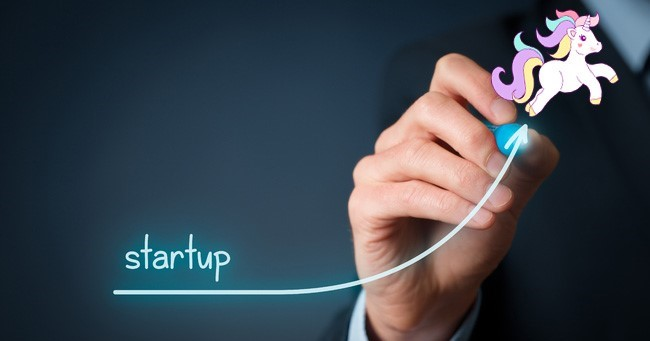

In [1]:
#importando libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Ler os dados
Base_Dados = pd.read_csv('Startups+in+2021+end.csv')

# Verificar Dimensão
Base_Dados.shape

(936, 8)

In [6]:
#Primeiros registros

Base_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [7]:
#Colunas

Base_Dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [8]:
# Renomear
Base_Dados.rename( columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
}, inplace=True )

In [9]:
#Verificando o tipo da info
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [10]:
#Campos nulos
Base_Dados.isnull().sum()

,0
Id,0
Empresa,0
Valor ($),0
Data de Adesão,0
Pais,0
Cidade,15
Setor,0
Investidores,1


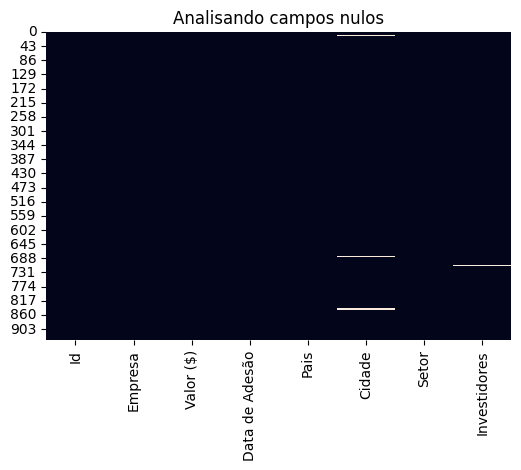

In [16]:
#Grafico
plt.figure(figsize=(6,4))
plt.title('Analisando campos nulos')
sns.heatmap(Base_Dados.isnull(), cbar= False);

In [17]:
#campos unicos
Base_Dados.nunique()

,0
Id,936
Empresa,935
Valor ($),192
Data de Adesão,589
Pais,47
Cidade,239
Setor,17
Investidores,920


In [22]:
#Valores unicos
Base_Dados['Empresa'].unique()

array(['Bytedance', 'SpaceX', 'Stripe', 'Klarna', 'Canva', 'Instacart',
       'Databricks', 'Revolut', 'Nubank', 'Epic Games', 'Chime', 'FTX',
       "BYJU's", 'Xiaohongshu', 'J&T Express', 'Fanatics', 'Yuanfudao',
       'DJI Innovations', 'SHEIN', 'Checkout.com', 'goPuff',
       'Plaid Technologies', 'Grammarly', 'Devoted Health', 'Faire',
       'Brex', 'SenseTime', 'JUUL Labs', 'Bitmain Technologies',
       'Biosplice Therapeutics', 'GoodLeap', 'ZongMu Technology',
       'Global Switch', 'Celonis', 'Weilong', 'Lalamove', 'Ripple',
       'Figma', 'Gusto', 'reddit', 'Talkdesk', 'Notion Labs', 'Thrasio',
       'Digital Currency Group', 'OutSystems', 'ServiceTitan', 'HEYTEA',
       'N26', 'Klaviyo', 'Northvolt', 'Tanium', 'Chehaoduo', 'Niantic',
       'OYO Rooms', 'Rapyd', 'Kavak', 'Snyk', 'Nuro', 'Lacework',
       'Tipalti', 'Tempus', 'Xingsheng Selected', 'Dream11', 'Fireblocks',
       'Caris Life Sciences', 'Dapper Labs', 'Hopin', 'Getir', 'Netskope',
       'Toss', 'Carta

In [25]:
#Valores unicos - Ranl
Base_Dados['Setor'].value_counts(normalize = True)

,proportion
Setor,
Fintech,0.202991
Internet software & services,0.178419
E-commerce & direct-to-consumer,0.108974
Artificial intelligence,0.073718
Health,0.067308
"Supply chain, logistics, & delivery",0.054487
Other,0.054487
Cybersecurity,0.043803
Mobile & telecommunications,0.039530


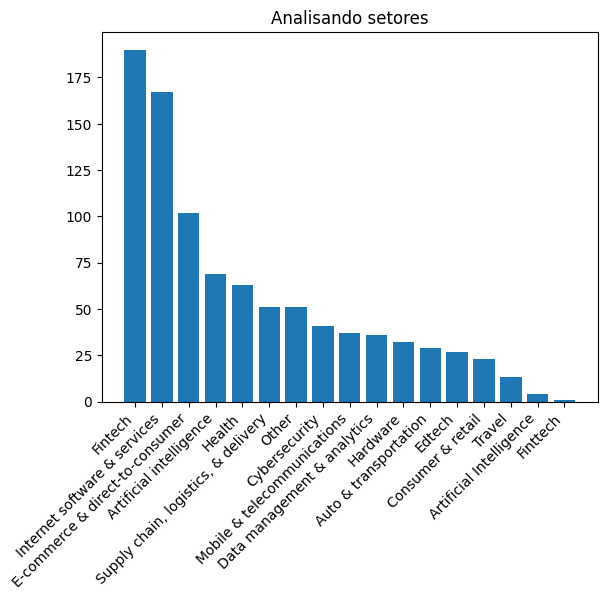

In [31]:
plt.bar(Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts())
plt.title('Analisando setores')
plt.xticks(rotation=45, ha='right')
plt.show()

In [33]:
#Paises
Analise = round(Base_Dados['Pais'].value_counts(normalize= True)* 100, 1)

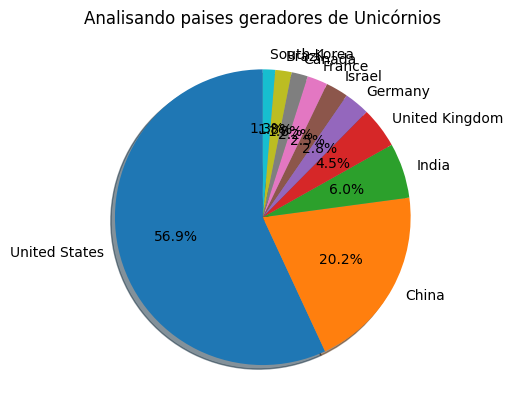

In [42]:
#plot geral dos Paises
plt.title('Analisando paises geradores de Unicórnios - Top 10')
plt.pie(
    Analise.head(10),
    labels = Analise.index[0:10],
    shadow = True,
    startangle= 90,
    autopct= '%1.1f%%',
);

In [47]:
#conversão para data
Base_Dados['Data de Adesão'] = pd.to_datetime(Base_Dados['Data de Adesão'])
Base_Dados['Data de Adesão'].head()

,Data de Adesão
0,2017-04-07
1,2012-12-01
2,2014-01-23
3,2011-12-12
4,2018-01-08


In [51]:
#Extrair o Ano e mes
Base_Dados['Mes'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).month
Base_Dados['Ano'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).year

#Extrair o dia
Base_Dados['Dia'] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).day

Base_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano,Dia
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017,7
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012,1
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014,23
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011,12
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018,8


In [57]:
#Tabela analitica
Analise_agrupada = Base_Dados.groupby(['Pais','Ano', 'Mes', 'Empresa']).count().reset_index()

Analise_agrupada.head()

,Pais,Ano,Mes,Empresa,Id,Valor ($),Data de Adesão,Cidade,Setor,Investidores,Dia
0,Argentina,2021,8,Uala,1,1,1,1,1,1,1
1,Australia,2018,1,Canva,1,1,1,1,1,1,1
2,Australia,2019,3,Airwallex,1,1,1,1,1,1,1
3,Australia,2021,5,SafetyCulture,1,1,1,1,1,1,1
4,Australia,2021,7,Culture Amp,1,1,1,1,1,1,1


In [58]:
Analise_agrupada.loc[
    Analise_agrupada['Pais'] == 'Brazil'
]

,Pais,Ano,Mes,Empresa,Id,Valor ($),Data de Adesão,Cidade,Setor,Investidores,Dia
12,Brazil,2018,3,Nubank,1,1,1,1,1,1,1
13,Brazil,2018,7,Movile,1,1,1,1,1,1,1
14,Brazil,2018,11,iFood,1,1,1,1,1,1,1
15,Brazil,2019,6,Loggi,1,1,1,1,1,1,1
16,Brazil,2019,9,QuintoAndar,1,1,1,1,1,1,1
17,Brazil,2019,10,EBANX,1,1,1,1,1,1,1
18,Brazil,2019,12,Wildlife Studios,1,1,1,1,1,1,1
19,Brazil,2020,1,Loft,1,1,1,1,1,1,1
20,Brazil,2020,12,C6 Bank,1,1,1,1,1,1,1
21,Brazil,2020,12,Creditas,1,1,1,1,1,1,1


In [67]:
# Transformando a coluna Valor
Base_Dados['Valor ($)'] = pd.to_numeric(Base_Dados['Valor ($)'].astype(str).str.replace('$','').str.replace(',',''), errors='coerce')
Base_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano,Dia
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017,7
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012,1
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014,23
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011,12
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018,8


In [69]:
# Tabela Analitica
Analise_Pais = Base_Dados.groupby(by=['Pais'])['Valor ($)'].sum().reset_index()

Analise_Pais.head()

,Pais,Valor ($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [70]:
Analise_Valor = Analise_Pais.sort_values('Valor ($)', ascending=False)
Analise_Valor.head()

,Pais,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


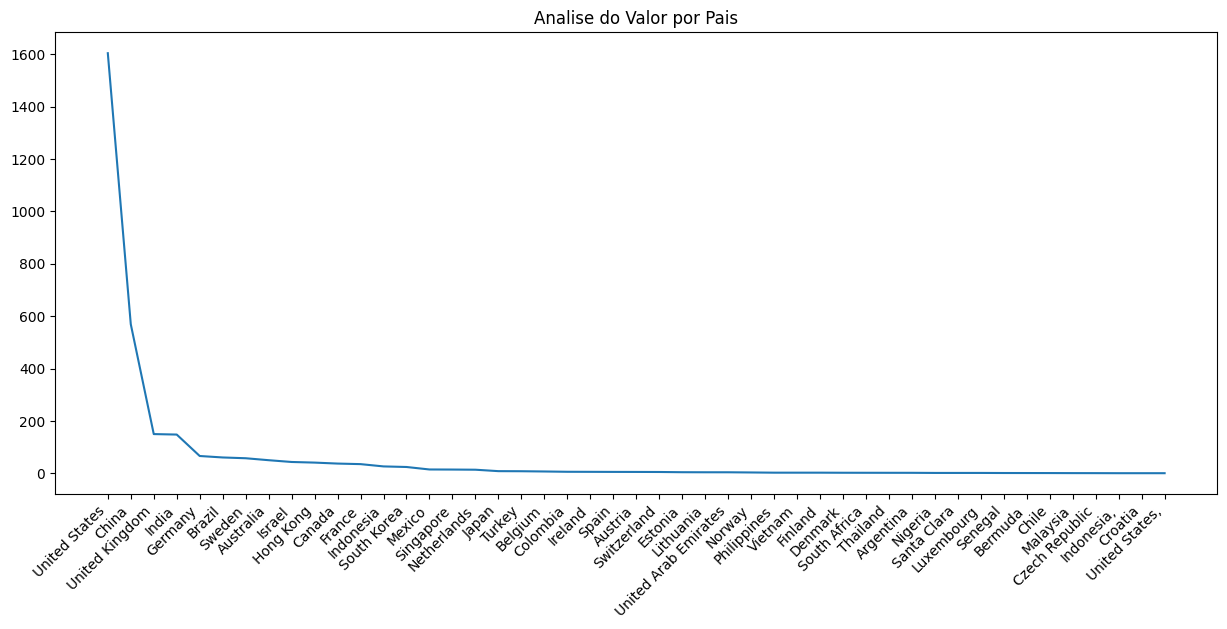

In [71]:
plt.figure( figsize=(15,6) )
plt.plot( Analise_Valor['Pais'], Analise_Valor['Valor ($)'] )
plt.title('Analise do Valor por Pais')
plt.xticks( rotation=45, ha='right');